In [23]:
import os
import pandas as pd
from pandas import DataFrame
import numpy as np
import math
import random
import time
import datetime
import matplotlib.pyplot as plt
import matplotlib as mlt
import seaborn as sns

SMALL_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE) 

sns.set_style('darkgrid')

0. load csv files
    - combine all csv files as one df

In [24]:
# 0 is reliable
# 1 is unreliable

CSV_FILE_DIR_HEAD = "/Volumes/MySSD/PycharmProjects/MIS-COV19/"

CSV_FILE_DIR0 = CSV_FILE_DIR_HEAD + "dataset/reliable"
CSV_FILE_NAMES0 = os.listdir(CSV_FILE_DIR0)

dfs0 = pd.DataFrame()
for CSV_FILE_NAME in CSV_FILE_NAMES0:
    if CSV_FILE_NAME[:12]=="news-dataset":
        df = pd.read_csv(CSV_FILE_DIR0 + '/' + CSV_FILE_NAME) 
        dfs0 = pd.concat([dfs0,df])
        
news_publishers = dfs0['publisher'].unique()

print("===== Reliable =====")
print("# Publishers: ", news_publishers.shape[0])
print(news_publishers)

CSV_FILE_DIR1 = CSV_FILE_DIR_HEAD + "dataset/unreliable"
CSV_FILE_NAMES1 = os.listdir(CSV_FILE_DIR1)

dfs1 = pd.DataFrame()
for CSV_FILE_NAME in CSV_FILE_NAMES1:
    if CSV_FILE_NAME[:12]=="news-dataset":
        df = pd.read_csv(CSV_FILE_DIR1 + '/' + CSV_FILE_NAME) 
        dfs1 = pd.concat([dfs1,df])
        
news_publishers = dfs1['publisher'].unique()

print("===== Unreliable =====")
print("# Publishers: ", news_publishers.shape[0])
print(news_publishers)

dfs = pd.concat([dfs0,dfs1])

===== Reliable =====
# Publishers:  22
['FiveThirtyEight' 'The Mercury News' 'The New Yorker'
 'National Public Radio (NPR)' 'PBS NewsHour' 'The Verge' 'USA Today'
 'Washington Monthly' 'The Washington Post' 'Yahoo! News' 'Reuters'
 'Slate' 'The New York Times' 'The Detroit News' 'ABC News' 'The Atlantic'
 'CBS News' 'Chicago Sun-Times' 'CNBC' 'Politico' 'Business Insider'
 'Los Angeles Daily News']
===== Unreliable =====
# Publishers:  8
['Natural News' 'The Gateway Pundit' 'Daily Mail' 'FrontPage Magazine'
 'Geller Report News' 'The Duran' 'True Pundit' 'Bipartisan Report']


1. publisher distribution
    - x-axis: publishers
    - y-axis: # news  
    

===== Reliable =====
FiveThirtyEight 	 # News:  2
The Mercury News 	 # News:  17
The New Yorker 	 # News:  12
National Public Radio (NPR) 	 # News:  92
PBS NewsHour 	 # News:  10
The Verge 	 # News:  139
USA Today 	 # News:  118
Washington Monthly 	 # News:  6
The Washington Post 	 # News:  33
Yahoo! News 	 # News:  36
Reuters 	 # News:  67
Slate 	 # News:  24
The New York Times 	 # News:  67
The Detroit News 	 # News:  31
ABC News 	 # News:  18
The Atlantic 	 # News:  13
CBS News 	 # News:  67
Chicago Sun-Times 	 # News:  322
CNBC 	 # News:  46
Politico 	 # News:  66
Business Insider 	 # News:  158
Los Angeles Daily News 	 # News:  20
Total # News:  1364
===== Unreliable =====
Natural News 	 # News:  21
The Gateway Pundit 	 # News:  5
Daily Mail 	 # News:  152
FrontPage Magazine 	 # News:  6
Geller Report News 	 # News:  1
The Duran 	 # News:  8
True Pundit 	 # News:  6
Bipartisan Report 	 # News:  4
Total # News:  203


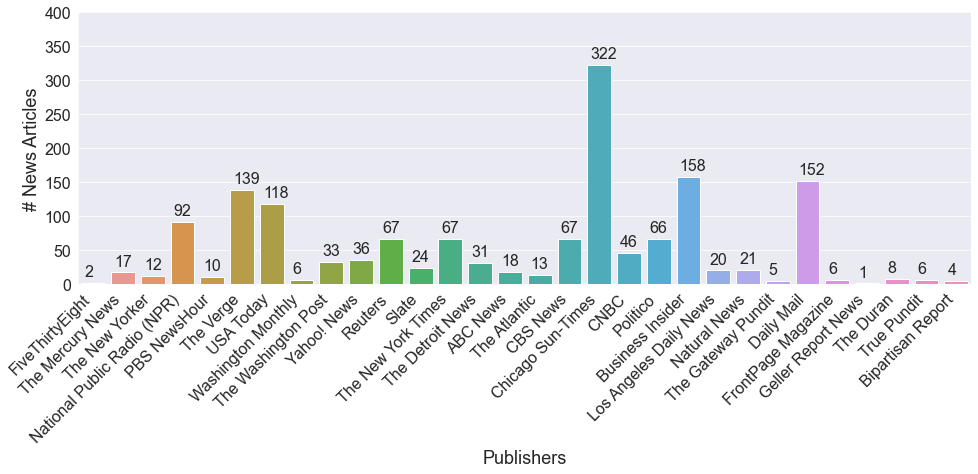

In [25]:
news_publishers = []
news_nums = []

print("===== Reliable =====")
total_news = 0
for CSV_FILE_NAME in CSV_FILE_NAMES0:
    if CSV_FILE_NAME[:12]=="news-dataset":
        df = pd.read_csv(CSV_FILE_DIR0 + '/' + CSV_FILE_NAME) 
        print(df['publisher'][0], "\t # News: ", df.shape[0])
        
        news_publishers.append(df['publisher'][0])
        news_nums.append(df.shape[0])
        
        total_news += df.shape[0]
print("Total # News: ", total_news)
        
print("===== Unreliable =====")
total_news = 0
for CSV_FILE_NAME in CSV_FILE_NAMES1:
    if CSV_FILE_NAME[:12]=="news-dataset":
        df = pd.read_csv(CSV_FILE_DIR1 + '/' + CSV_FILE_NAME) 
        print(df['publisher'][0], "\t # News: ", df.shape[0])
        
        news_publishers.append(df['publisher'][0])
        news_nums.append(df.shape[0])
        
        total_news += df.shape[0]
print("Total # News: ", total_news)

plt.figure(figsize=(16,5))
ax = sns.barplot(x=news_publishers,y=news_nums)
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+10))
plt.xticks(rotation=45, horizontalalignment='right')
plt.xlabel('Publishers')
plt.ylabel('# News Articles')
plt.ylim([0,400])
plt.savefig(CSV_FILE_DIR_HEAD+'figure/publisher_newsNum.eps', bbox_inches='tight')
plt.show()

2. publish_date distribution
    - x-axis: date
    - y-axis: # news 

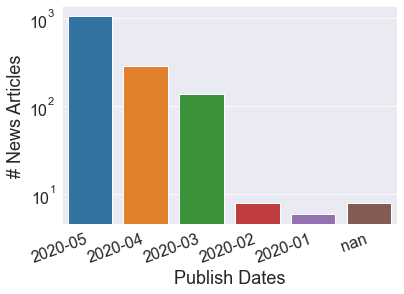

In [4]:
publish_dates = dfs['publish_date'].values
dates = np.array(publish_dates, dtype=str)
nums = np.zeros(publish_dates.shape, dtype=int)
for idx, date in enumerate(dates):
    if date == 'nan':
        nums[idx] = 0
    else:
        dates[idx] = date[:7]
        time_array = time.strptime(date, "%Y-%m-%d")
        nums[idx] = int(time.mktime(time_array))
tem = list(zip(nums, dates))
tem = sorted(tem, key=lambda x: x[0], reverse=True)
num, dates = zip(*tem)

ax = sns.countplot(list(dates))
plt.xticks(rotation=20, horizontalalignment='right')
plt.xlabel('Publish Dates')
plt.ylabel('# News Articles')
# plt.ylim([0,800])
ax.set_yscale('log')
plt.savefig(CSV_FILE_DIR_HEAD+'figure/publishDate_count.eps', bbox_inches='tight')
plt.show()

3. author distribution
    - x-axis: # authors
    - y-axis: # news 

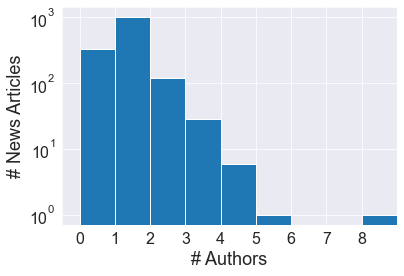

In [5]:
hist_kws = {'alpha': 1}

authors = dfs['author'].values
authors = np.array(authors, dtype=str)
nums = np.zeros(authors.shape, dtype=int)
for idx, author in enumerate(authors):
    if author == "[]":
        nums[idx] = 0
    else:
        author_names = author[1:-1].split(',')
        nums[idx] = len(author_names)

ax = sns.distplot(nums, bins=9, hist=True, kde=False, rug=False, fit=None, norm_hist=False, hist_kws=hist_kws)
plt.xlabel('# Authors')
plt.ylabel('# News Articles')
plt.xlim([nums.min()-0.5,nums.max()])
plt.xticks(np.arange(nums.max()))
# plt.ylim([0,850])
ax.set_yscale('log')
plt.savefig(CSV_FILE_DIR_HEAD+'figure/authorNum_count.eps', bbox_inches='tight')
plt.show()

# ax = sns.countplot(author_nums)
# plt.xlabel('# Authors')
# plt.ylabel('# News Articles')
# ax.set_yscale('log')
# plt.savefig(CSV_FILE_DIR_HEAD+'figure/authorNum_count.eps', bbox_inches='tight')
# plt.show()

4. distribution of # words within a news article
    - x-axis: # words (title+bodytext)
    - y-axis: # news articles

Democrats Say The Worst Of The Coronavirus Is Yet To Come. Republicans Say The Worst Is Over.
[17 12 14 11  9]
[1489 1124  866  305  492]
[1506 1136  880 ...  432  461  742]


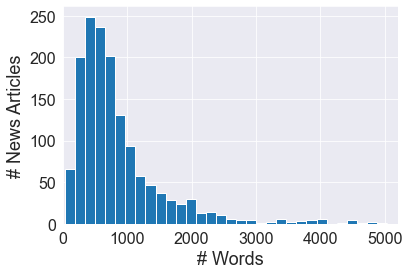

In [6]:
titles = dfs['title'].values
titles = np.array(titles, dtype=str)
title_word_nums = np.zeros(titles.shape, dtype=int)

bodies = dfs['body_text'].values
bodies = np.array(bodies, dtype=str)
body_word_nums = np.zeros(bodies.shape, dtype=int)

print(titles[0])
# print(bodies[0])
# print(titles[5].split(' '))

for idx, title in enumerate(titles):
    title_word_nums[idx] = len(title.split(' '))
print(title_word_nums[:5])

for idx, body in enumerate(bodies):
    body_word_nums[idx] = len(body.split(' '))
print(body_word_nums[:5])

nums = title_word_nums + body_word_nums
print(nums)
    
ax = sns.distplot(nums, bins=80, hist=True, kde=False, rug=False, fit=None, norm_hist=False, hist_kws=hist_kws)
plt.xlabel('# Words')
plt.ylabel('# News Articles')
plt.xlim([0, 5200])
# plt.xticks(np.arange(max(word_nums)))
# plt.ylim([0,850])
# ax.set_yscale('log')
plt.savefig(CSV_FILE_DIR_HEAD+'figure/wordNum_count.eps', bbox_inches='tight')
plt.show()    

5. image distribution
    - x-axis: have an image or have no image
    - y-axis: # news articles
    

# News articles with images:  1491
# News articles with NO images:  10


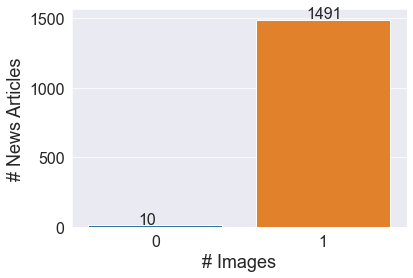

In [7]:
images = dfs['image'].values
images = np.array(images, dtype=str)
nums = np.zeros(images.shape, dtype=int)
for idx, image in enumerate(images):
    if image == 'nan':
        nums[idx] = 0
    else:
        nums[idx] = 1

print("# News articles with images: ", nums.sum())
print("# News articles with NO images: ", nums.shape[0] - nums.sum())

ax = sns.countplot(nums)
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+10))
plt.xlabel('# Images')
plt.ylabel('# News Articles')
# ax.set_yscale('log')
plt.savefig(CSV_FILE_DIR_HEAD+'figure/imageNum_count.eps', bbox_inches='tight')
plt.show()        

4. political bias distribution
    - x-axis: political bias
    - y-axis: # publishers

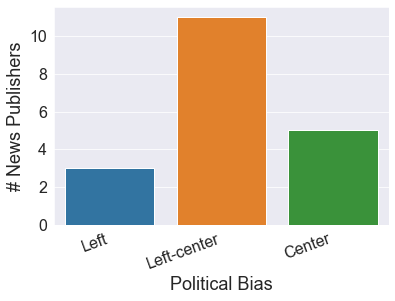

In [8]:
news_publishers = []
political_bias = []

for CSV_FILE_NAME in CSV_FILE_NAMES0:
    if CSV_FILE_NAME[:12]=="news-dataset":
        df = pd.read_csv(CSV_FILE_DIR0 + '/' + CSV_FILE_NAME)         
        news_publishers.append(df['publisher'][0])
        political_bias.append(df['political_bias'][0])

# for CSV_FILE_NAME in CSV_FILE_NAMES1:
#     if CSV_FILE_NAME[:12]=="news-dataset":
#         df = pd.read_csv(CSV_FILE_DIR1 + '/' + CSV_FILE_NAME) 
#         news_publishers.append(df['publisher'][0])
#         political_bias.append(df['political_bias'][0])

ax = sns.countplot(political_bias, order = ['Left', 'Left-center', 'Center'])
# for p in ax.patches:
#         ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+0.1))
plt.xticks(rotation=20, horizontalalignment='right')
plt.xlabel('Political Bias')
plt.ylabel('# News Publishers')
plt.savefig(CSV_FILE_DIR_HEAD+'figure/politicalBias_count.eps', bbox_inches='tight')
plt.show()


7. NewsGuard distribution
    - x-axis: NewsGuard score
    - y-axis: # news publishers

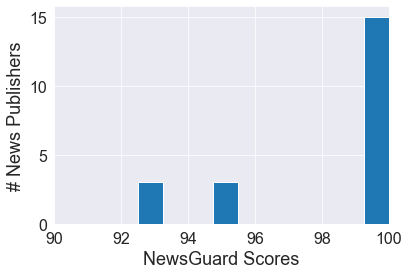

In [22]:
news_publishers = []
newsguard_scores = []

for CSV_FILE_NAME in CSV_FILE_NAMES0:
    if CSV_FILE_NAME[:12]=="news-dataset":
        df = pd.read_csv(CSV_FILE_DIR0 + '/' + CSV_FILE_NAME)         
        news_publishers.append(df['publisher'][0])
        newsguard_scores.append(df['news_guard_score'][0])

# for CSV_FILE_NAME in CSV_FILE_NAMES1:
#     if CSV_FILE_NAME[:12]=="news-dataset":
#         df = pd.read_csv(CSV_FILE_DIR1 + '/' + CSV_FILE_NAME) 
#         news_publishers.append(df['publisher'][0])
#         newsguard_score.append(df['news_guard_score'][0])

# ax = sns.countplot(newsguard_scores)
ax = sns.distplot(newsguard_scores, bins=10, hist=True, kde=False, rug=False, fit=None, norm_hist=False, hist_kws=hist_kws)
plt.xlabel('NewsGuard Scores')
plt.ylabel('# News Publishers')
plt.xlim([90, 100])
plt.savefig(CSV_FILE_DIR_HEAD+'figure/newsGuardScore0_count.eps', bbox_inches='tight')
plt.show()    

8. MBFC distribution
    - x-axis: MBFC level
    - y-axis: # news publishers

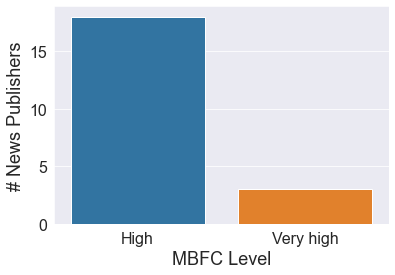

In [10]:
news_publishers = []
mbfc_level = []

for CSV_FILE_NAME in CSV_FILE_NAMES0:
    if CSV_FILE_NAME[:12]=="news-dataset":
        df = pd.read_csv(CSV_FILE_DIR0 + '/' + CSV_FILE_NAME)         
        news_publishers.append(df['publisher'][0])
        mbfc_level.append(df['mbfc_level'][0])

# for CSV_FILE_NAME in CSV_FILE_NAMES1:
#     if CSV_FILE_NAME[:12]=="news-dataset":
#         df = pd.read_csv(CSV_FILE_DIR1 + '/' + CSV_FILE_NAME) 
#         news_publishers.append(df['publisher'][0])
#         mbfc_level.append(df['mbfc_level'][0])

ax = sns.countplot(mbfc_level)
plt.xlabel('MBFC Level')
plt.ylabel('# News Publishers')
# plt.ylim([0,30])
plt.savefig(CSV_FILE_DIR_HEAD+'figure/mbfcLevel0_count.eps', bbox_inches='tight')
plt.show()